<a href="https://colab.research.google.com/github/devzohaib/Drugs-Classification/blob/master/Drugs_Classification_by_Tuning_SVM_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drugs Classification 

Team memebers

1. Muhammad Zohaib

2. Muhammad Atabic Umer 

In [17]:
# library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

# Part-1 : Data Exploration 

In [18]:
%%time 
# dataset loading from google drive 
df = pd.read_csv('/content/drive/MyDrive/MOA-DataSet/completedataset.csv')

# dataframe info
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45814 entries, 0 to 45813
Columns: 873 entries, g-0 to d_type
dtypes: float64(872), int64(1)
memory usage: 305.1 MB
CPU times: user 10.3 s, sys: 1.32 s, total: 11.6 s
Wall time: 13.4 s


In [19]:
# glimps of top 5 rows 
df.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,d_type
0,118.643941,-13.218667,2.184891,42.112268,-6.040842,2.550875,75.479584,-115.997697,-50.051378,-64.033741,-112.514135,-3.242258,171.075207,125.711931,-92.554134,-107.435830,34.556252,-68.485010,124.786301,-20.861839,85.481247,9.364830,-17.106612,-3.467388,-0.367354,0.804454,-129.394650,114.808971,-45.902969,12.206467,5.094220,-81.701751,27.615267,13.276158,-11.182027,38.650225,-171.461049,-40.432553,-17.550774,-184.695115,...,90.527694,-241.588185,-5.696806,15.117005,-13.856834,71.622300,18.919323,-181.916222,50.827464,-146.341486,103.210507,-87.437385,-8.516133,2.162688,10.863142,57.016046,124.269855,-32.876886,194.538619,80.678984,10.061677,12.009600,185.513736,147.613008,32.539104,29.782104,-34.541636,-87.957487,112.314957,14.039135,60.072199,64.337753,-10.090658,-11.512412,-38.648068,-124.733743,-162.302105,69.337222,3.992394,75
1,-22.043089,13.928267,-182.688116,19.866897,-9.176828,16.759349,-124.064386,3.532671,-46.147529,3.248790,4.789946,-10.221755,166.167918,57.075528,-106.683335,-72.198128,-167.667805,-39.631243,-248.326117,2.640104,-8.363727,6.616424,208.755287,-5.915376,187.652648,141.912608,56.703115,94.835614,64.961602,25.370065,-26.679986,230.031953,8.224231,11.950620,5.915540,-98.548329,-107.796515,-144.903751,-1.142448,68.993539,...,-61.226791,-103.918990,3.385220,2.655957,-1.817762,-136.092068,-7.394035,81.213735,-111.467373,-205.455509,145.292824,-61.250459,8.693638,-8.540620,24.463431,-196.034744,-1.026644,73.810407,-196.173365,189.854233,2.999397,54.738655,7.366126,83.852613,19.228946,-197.617350,-32.938374,-58.966502,45.888236,-9.090328,139.490821,166.967938,-2.393810,-14.063597,-111.832045,-68.693538,-87.046625,-84.384418,32.782874,152
2,82.090494,4.594474,81.819500,-176.743600,5.139240,-15.228571,161.545589,12.095395,58.571576,9.322247,-103.893237,-7.738664,-7.682501,127.747272,9.503663,-42.002207,-12.962307,-84.389521,-5.402777,-20.149264,43.886473,-12.200712,37.648399,5.502974,-60.449590,-157.999386,21.117989,-113.201579,117.393579,1.035644,20.309861,19.430760,209.404592,8.001243,8.807505,-140.091486,-51.420060,59.482893,-27.075974,-70.259410,...,-114.117392,-65.078380,2.459266,16.177836,-4.341244,21.416024,-12.734058,-40.398214,-7.449269,-176.194961,-24.697012,39.301173,-18.214856,-7.299186,26.101322,-67.806580,-16.925431,63.491461,-138.245756,-110.141745,-14.351709,-113.049692,161.894350,-32.363011,127.654085,70.529225,-92.652970,-144.210396,-187.620568,-40.344544,-116.513223,255.536012,-0.247431,-3.542485,192.755475,-146.752104,-153.839563,7.300922,-8.991427,198
3,-33.562922,4.455385,-146.235591,101.722196,-9.429638,0.975684,55.640298,-64.762796,-1.990672,-73.484936,-99.628300,-1.008251,-65.290223,0.630345,98.653862,-77.577521,140.420338,-81.579497,33.666131,7.253323,32.265379,-11.374849,-12.090829,12.604437,-31.205196,24.641610,-51.310155,-51.885004,128.437653,-2.373614,21.421087,-92.814156,79.477241,13.001995,-0.543431,85.329827,31.856277,152.250921,3.730397,-0.030419,...,285.144790,31.958433,-1.597953,-12.863862,0.617028,4.881773,-5.051199,53.205633,116.987509,-47.819088,-172.895265,0.469540,-4.489354,5.122552,-58.655170,42.280949,-82.877140,-51.393492,-1.693013,-98.955299,6.370198,-146.841819,-10.074073,159.100735,84.887923,111.807195,0.442798,-47.317781,-68.164779,98.440852,3.137041,-100.138742,-4.347304,-2.210464,-120.317523,111.386546,-18.211930,-92.987603,-23.948545,56
4,-201.554227,2.143944,57.754304,-50.199327,-4.288996,-6.888212,136.935587,14.928153,72.989377,57.476170,-139.545355,19.824476,-100.429123,-29.458883,-125.988940,-137.176336,142.405375,-105.746332,79.414423,0.744972,-61.337763,16.137495

In [20]:
# dimension of dataset 
print("Number of rows,columns:",df.shape)

Number of rows,columns: (45814, 873)


In [21]:
# NA value 
df.isnull().sum().sum()

0

In [22]:
# number of classes in target variable
df.d_type.nunique()

206

# Part-2 Features Selection/Extraction 

before applying any transformation to data we need to split our data, so data after the traning we can the test the model accuracy on the hold out data. so that model accuracy can be tested on the unseen data. 


*   First seperating the features and target variable into `X` and `y`
*   Then  Spliting the data into 70/30 split using `train_test_split`
*    we use `stratify` split so that every clases have balance in train set and test set.





In [23]:
# seperating featues and target
X = df.drop('d_type',axis=1)
y = df['d_type']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y, test_size=0.3, random_state=9999)

# traning set
print("X_train  :",X_train.shape)
print("y_train  :",y_train.shape)

# testing set
print("X_test   :",X_test.shape)
print("y_test   :",y_test.shape)

X_train  : (32069, 872)
y_train  : (32069,)
X_test   : (13745, 872)
y_test   : (13745,)


## Variance thresholding
Removing Low Variance features ( contaning little information)

Selecting the subset of features with variaance above a given threshold.

Variance thresholding (VT) is one of the most basic approaches to feature selection. It is motivated by the idea that features with low variance are likely less interesting (and useful) than features with high variance.

In [24]:

# Create thresholder object 
thresholder = VarianceThreshold(threshold=.5)

# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(X_train)


features_high_variance.shape[1]

872

## Droping Highly Correlated Features
we suspect that features are highly correlated. Using a correlation matrix to check for highly correlated features. If highly correlated features exist, consider dropping one of the correlated features
____

One problem often run into in machine learning is highly correlated features. If two features are highly correlated, then the information they contain is very similar, and it is likely redundant to include both features. The solution to highly correlated features is simple: remove one of them from the feature set.

In [25]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features
X_train_d = X_train.drop(X_train.columns[to_drop], axis=1)

X_train_d.shape[1]

872

## Reducing Features Using Principal Components
we want to reduce the number of features while retaining the variance in the data.Principal component analysis (PCA) is a popular linear dimensionality reduction technique. PCA projects observations onto the (hopefully fewer) principal components of the feature matrix that retain the most variance. PCA is an unsupervised technique, meaning that it does not use the information from the target vector and instead only considers the feature matrix.
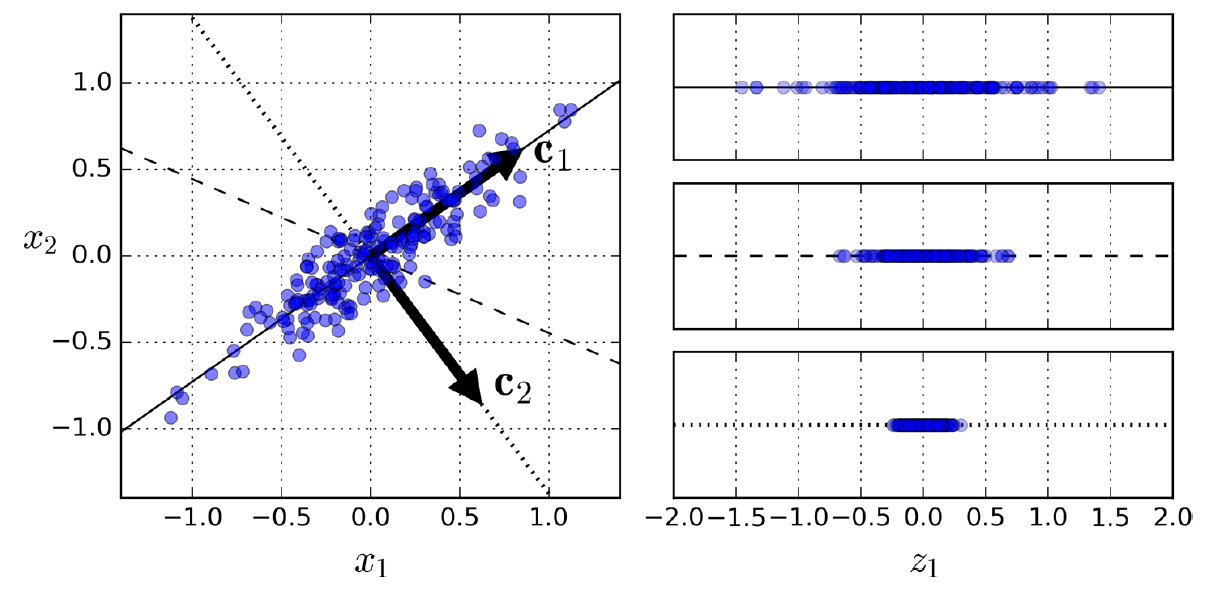

In [26]:
# StandarScaler : mean 0, sd 1
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Make an instance of the PCA
pca = PCA(.95)

pca.fit(X_train)

pca.n_components_

265

In [27]:
# apply transformation to Train and Test set
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# traning set
print("X_train  :",X_train.shape)

# testing set
print("X_test   :",X_test.shape)

X_train  : (32069, 265)
X_test   : (13745, 265)


###Model selection is the most important decison of machine learnig process. after identifying Supervised also Classification problem. we decided to use Scikit-learn Cheat-Sheet for model selection. 
and we select 3 base model for traning. 


1.   Knn
2.   LinearSVM
3.  Naive Bayes



# Part-3 Selection of Model 

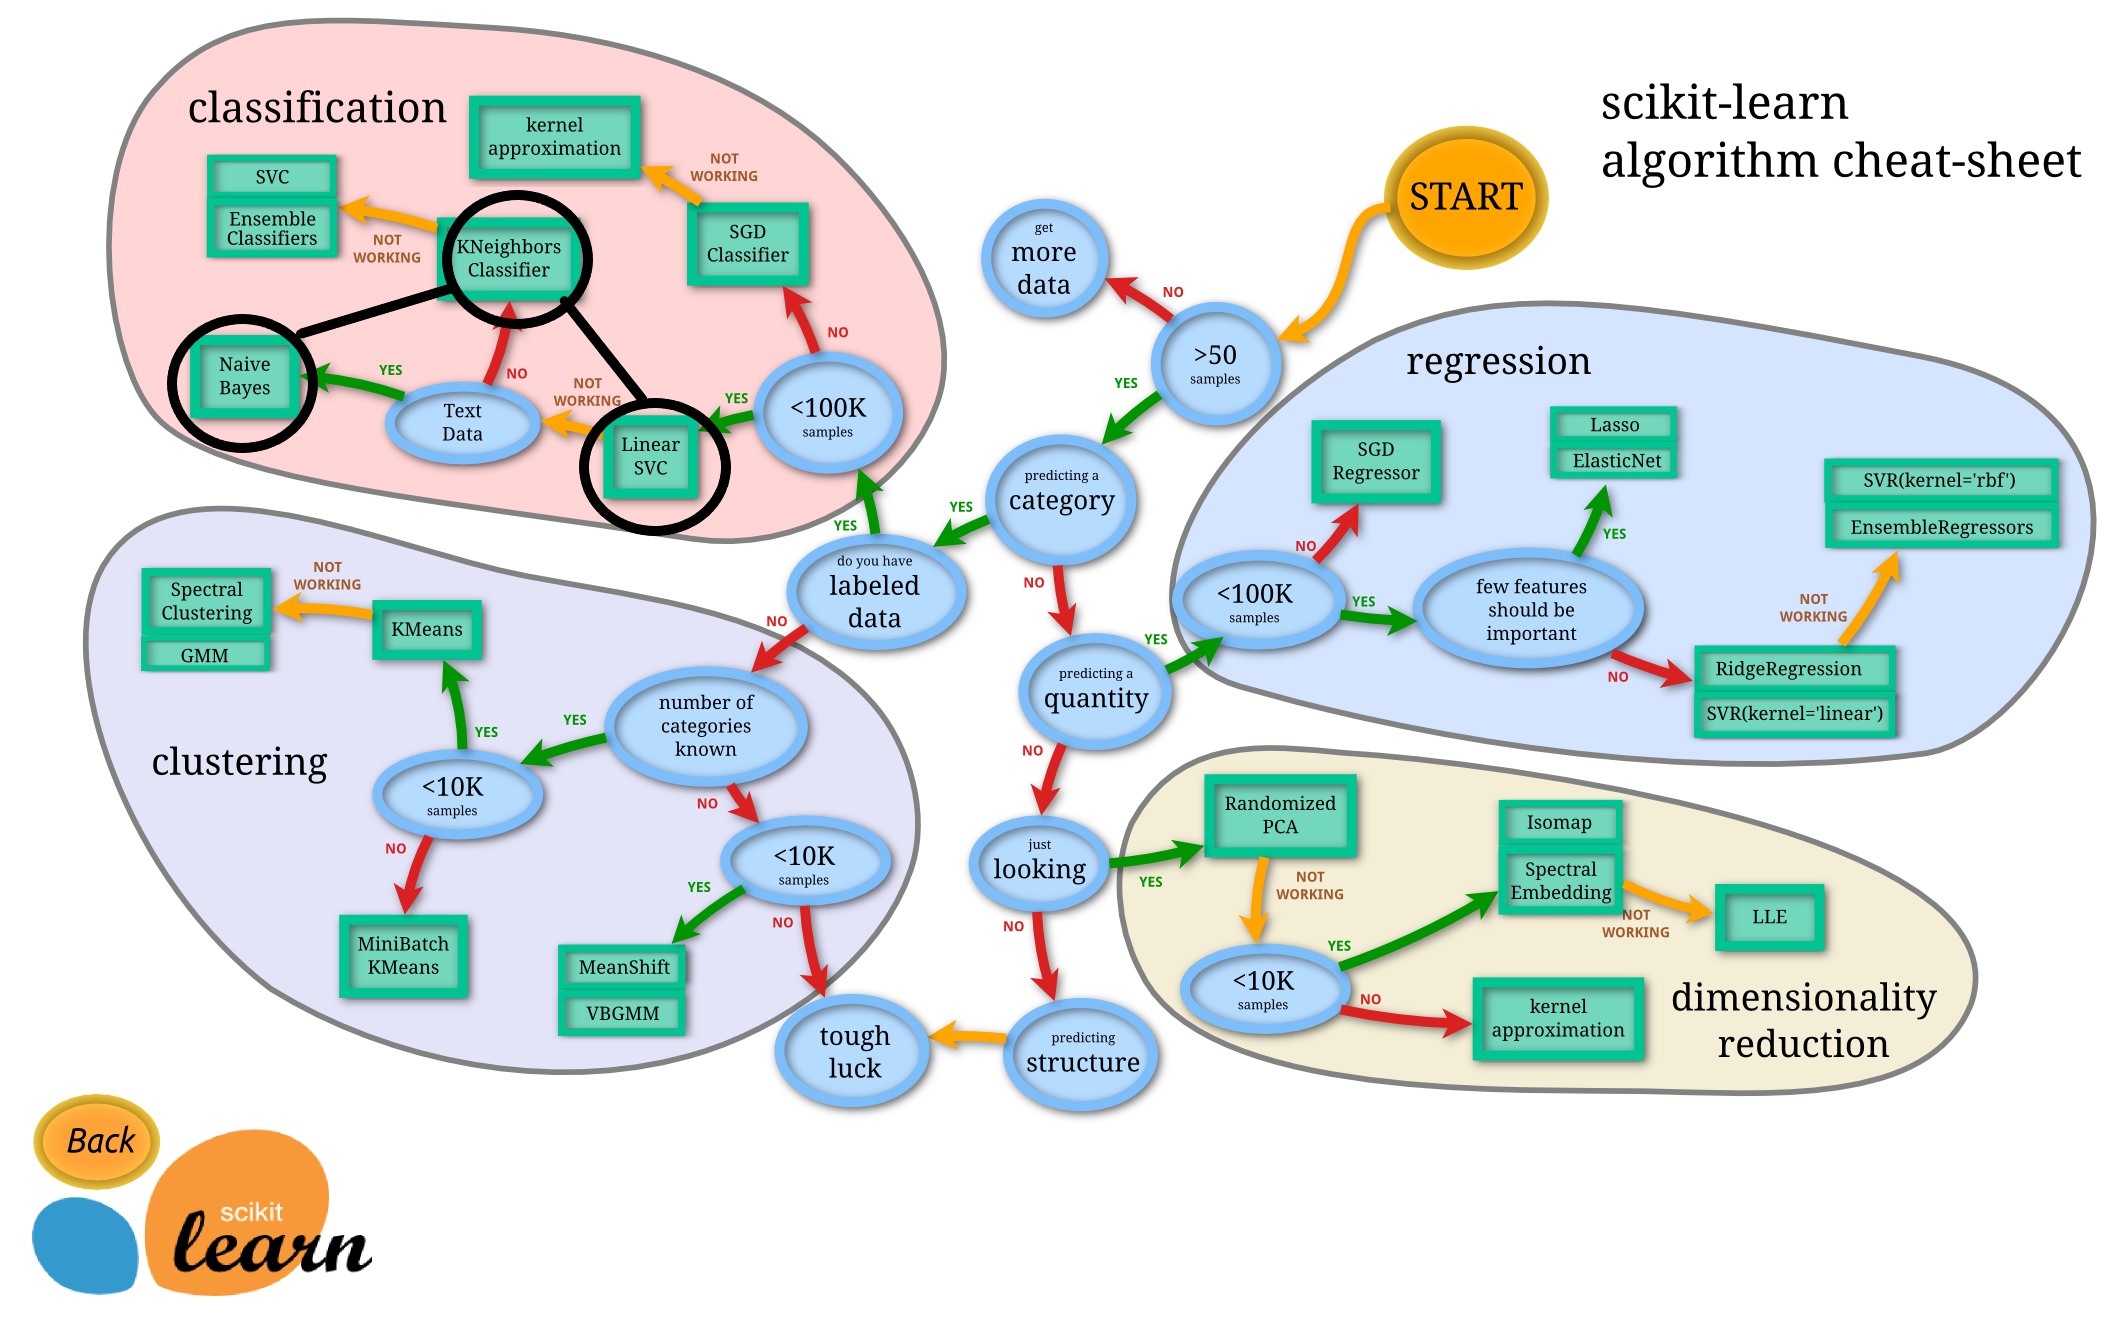

## 1-KNneighbor Classifer Knn
Knn is an supervised machine learnign model. which is based on distance metric between the featues vecture.

In [28]:
%%time

model = KNeighborsClassifier()

# training 
model.fit(X_train,y_train)

# prediction
predictions = model.predict(X_test)

# accuracy 
print(accuracy_score(y_test,predictions))

0.3640596580574754
CPU times: user 5min 47s, sys: 120 ms, total: 5min 47s
Wall time: 5min 47s


## 2-Naive bayes 
Naive Bayes is supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 



In [29]:
%%time

model = GaussianNB()

# training 
model.fit(X_train,y_train)

# prediction
predictions = model.predict(X_test)

# accuracy 
print(accuracy_score(y_test,predictions))

0.8156420516551474
CPU times: user 5.34 s, sys: 434 ms, total: 5.78 s
Wall time: 5.8 s


## 3-Linear Support Vector Classification

In [30]:
%%time

model = LinearSVC()

# training 
model.fit(X_train,y_train)

# prediction
predictions = model.predict(X_test)

# accuracy 
print(accuracy_score(y_test,predictions))

0.6921789741724264
CPU times: user 3min 51s, sys: 197 ms, total: 3min 52s
Wall time: 3min 53s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Part-4 Support Vector Machine / Classifer Hyperparameter tuning using GridSerarch 
We use Exhaustive search over specified parameter for SVM. we use kaggle platfrom for the traning purpose also as well as colab. total traning time was `3 hours and 8 min` so instead of running the same code in colab we put the screen for the reference. 
____
### Grid Search with 5-fold cross validation 
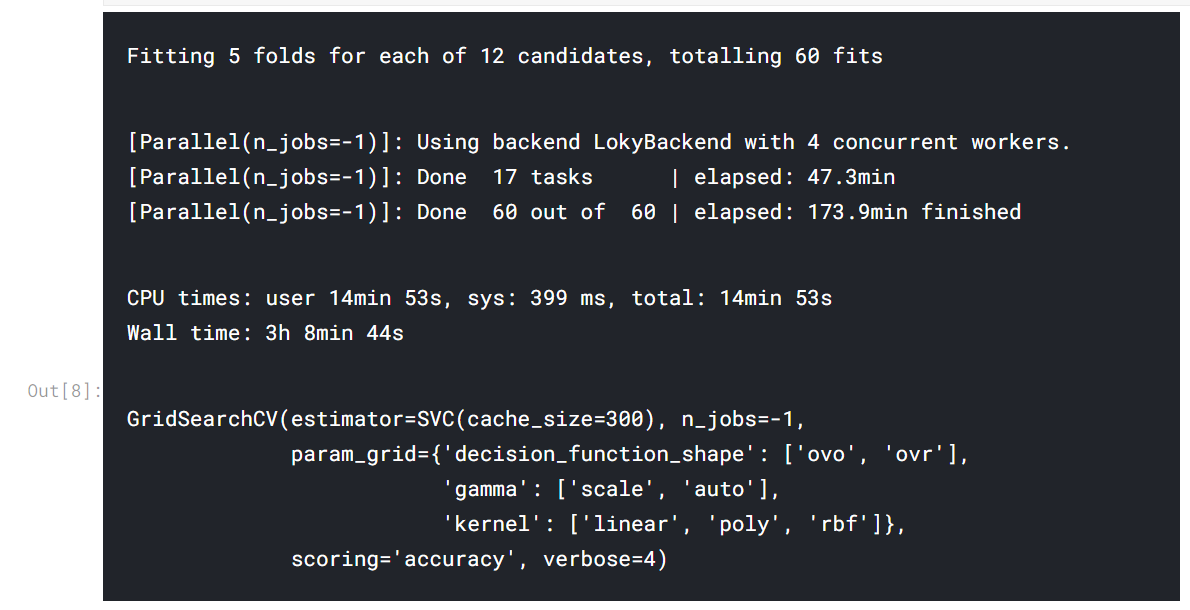

In [31]:
"""

%%time
# defining parameter range 
param_grid = {   
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf'],
              'decision_function_shape':['ovo', 'ovr']
              }  
   
grid = GridSearchCV(SVC(cache_size=300), param_grid, refit = True, verbose = 4,n_jobs=-1,scoring='accuracy') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 

"""

"\n\n%%time\n# defining parameter range \nparam_grid = {   \n              'gamma':['scale', 'auto'],\n              'kernel': ['linear', 'poly', 'rbf'],\n              'decision_function_shape':['ovo', 'ovr']\n              }  \n   \ngrid = GridSearchCV(SVC(cache_size=300), param_grid, refit = True, verbose = 4,n_jobs=-1,scoring='accuracy') \n   \n# fitting the model for grid search \ngrid.fit(X_train, y_train) \n\n"

## Grid Search Results
after fitting the total 60 model with different parameter it give us the best parameter with highest accuracy results on validation set. 
here are the resutls from the kaggle notebook.
___
### Best Parameter for SVM
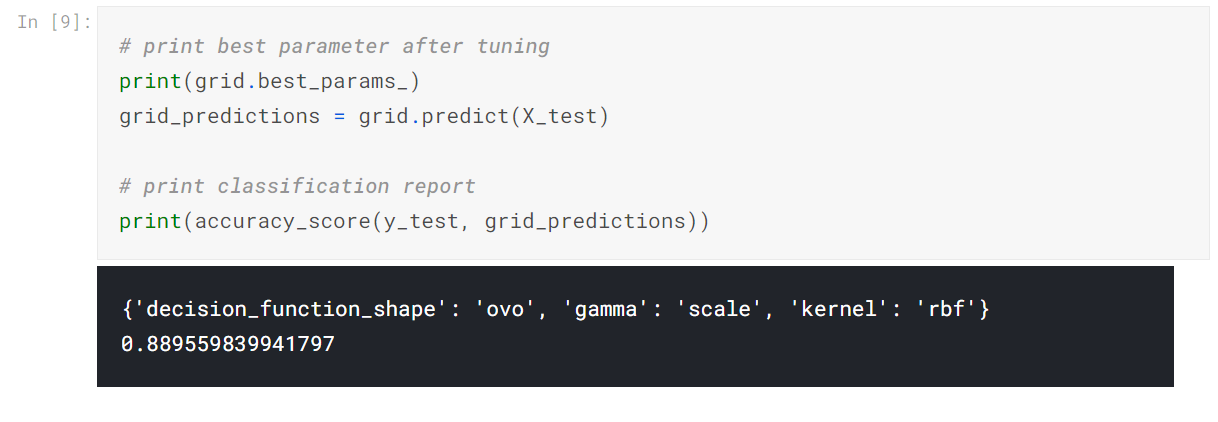

# Final Tuned SVM Model

In [32]:
%%time
# tuned model 
model = SVC(kernel='rbf',gamma='scale',cache_size=300,decision_function_shape='ovo')

# training 
model.fit(X_train, y_train)

# prediction
prediction = model.predict(X_test)

# accuracy
accuracy_score(y_test,prediction)

CPU times: user 20min 57s, sys: 384 ms, total: 20min 57s
Wall time: 20min 59s


In [33]:
accuracy_score(y_test,prediction)

0.889559839941797

More on.....
We not only stop at tuning 60 model with differnt hyperparameter. 
in this phase we also increase the Grid Serach parameter to be tunned . 
###Problem we are facing are 

1.   Training require Good hardware/ processing power. 
2.   We are using colab/kaggle they not only require stable network connection but sometime we need to restart our working notebook. 
 
____
### Last Screen shot tuning with 84 different combination of parameter.
 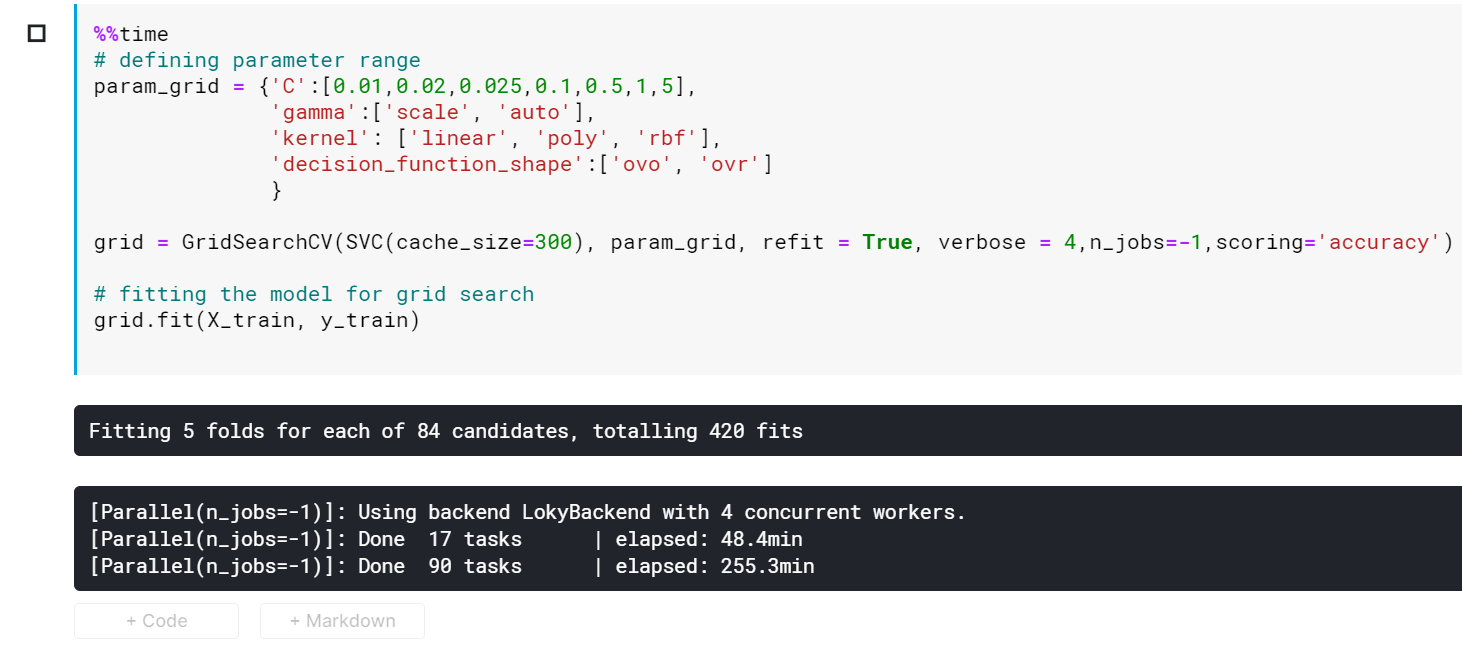



kaggle notebook are also availabel





Data Exploration

https://www.kaggle.com/devzohaib/part-1-exploratory-data-analysis

Features Selection/Extraction

https://www.kaggle.com/devzohaib/part-3-features-selection-extraction

Base Model testing 

https://www.kaggle.com/devzohaib/part-2-baseline-model-testing

SVM hyperparater tunig 

https://www.kaggle.com/devzohaib/part-5-svm-tuning